# Distribution of values based on the authenticity of the banknote

_We will use boxplots here to get an idea of the distribution of values for the following features based on the authenticity of the banknote:_
- height_left
- height_right
- diagonal
- length
- margin_low
- margin_up


### height_left et height_right

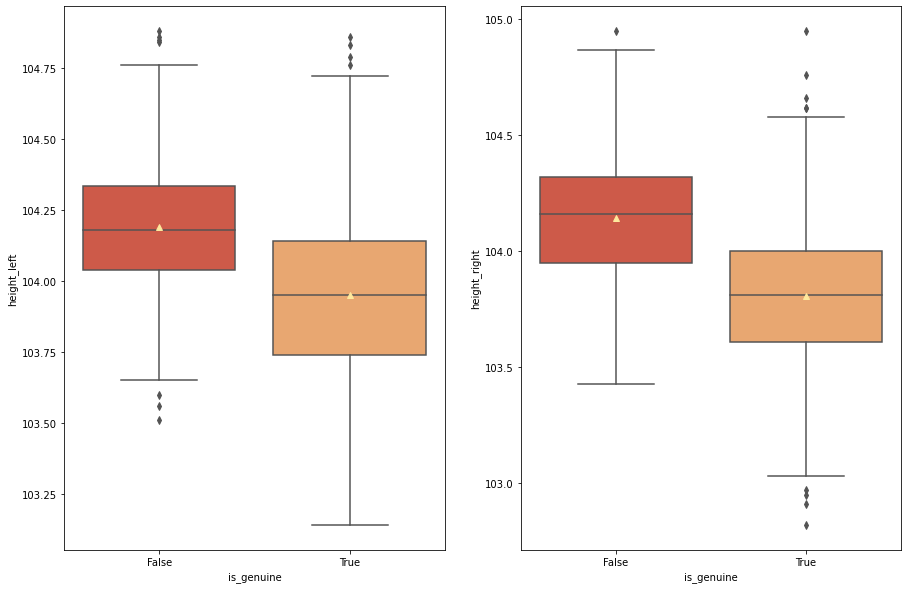

In [53]:
plt.figure(figsize=(15, 10))

plt.subplot(121)
sns.boxplot(x='is_genuine', y='height_left', data=data, showmeans=True)
plt.subplot(122)
sns.boxplot(x='is_genuine', y='height_right', data=data, showmeans=True)

plt.show()


The banknotes are on average longer on the left side for counterfeit notes, and the same observation applies to the right side. 50% of counterfeit banknotes have a length of the left edge greater than 104.20 mm, while a little less than a quarter of genuine banknotes fall into this category.

The observation is almost similar for the right edge.

### margin_low et margin_up

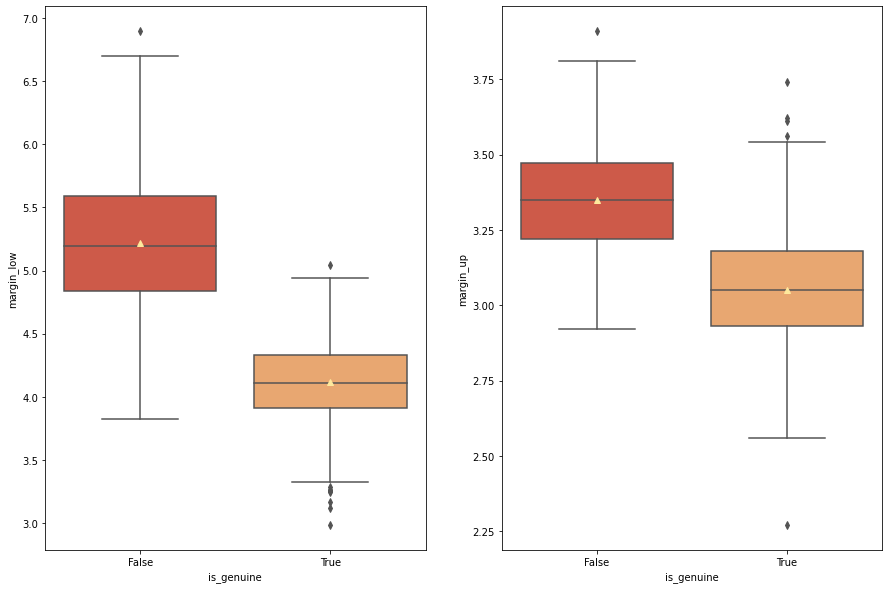

In [54]:
plt.figure(figsize=(15, 10))
plt.subplot(121)
sns.boxplot(x='is_genuine', y='margin_low', data=data, showmeans=True)
plt.subplot(122)
sns.boxplot(x='is_genuine', y='margin_up', data=data, showmeans=True)

plt.show()

The bottom margin is significantly longer for counterfeit banknotes. The same observation applies to the top margin, where 3/4 of the counterfeit observations are longer than 3/4 of the genuine ones.

### diagonal et length

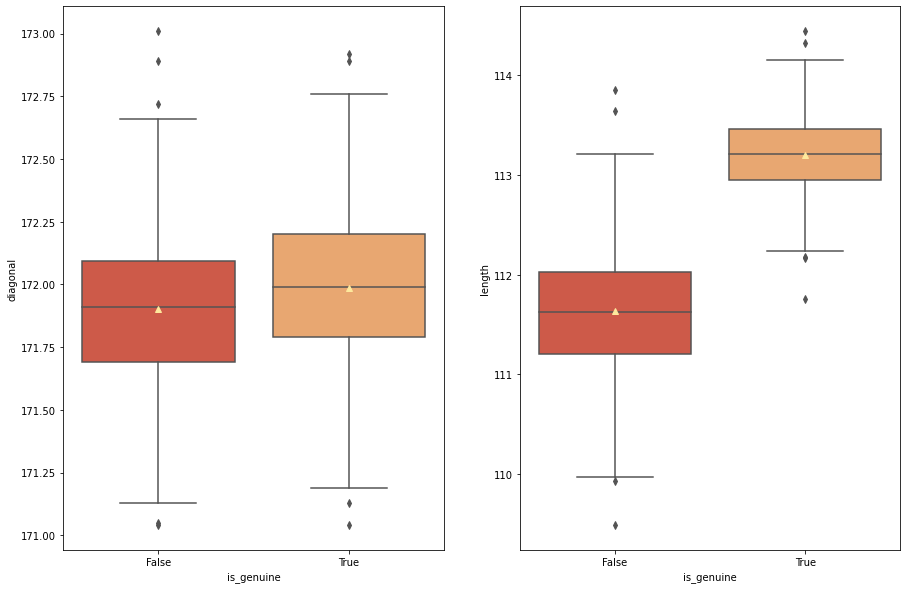

In [55]:
plt.figure(figsize=(15,10))
plt.subplot(121)
sns.boxplot(x='is_genuine', y='diagonal', data=data, showmeans=True)
plt.subplot(122)
sns.boxplot(x='is_genuine', y='length', data=data, showmeans=True)
plt.show()

Concerning length, counterfeit banknotes are on average shorter. Almost all genuine banknotes are longer than 112mm, which is the case for only 1/4 of the counterfeit banknotes. We could hypothesize that the authenticity of a banknote might depend on its length. For the diagonal, the distribution is almost similar.

# Correlations:

Creating a correlation matrix using the .corr() method.

In [56]:
data.iloc[:, :].corr()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,1.000000,0.132756,-0.379833,-0.485092,-0.786177,-0.606262,0.849285
diagonal,0.132756,1.000000,0.019472,-0.024492,-0.110639,-0.055649,0.097587
height_left,-0.379833,0.019472,1.000000,0.242279,0.308724,0.246522,-0.320863
height_right,-0.485092,-0.024492,0.242279,1.000000,0.390948,0.307005,-0.401751
margin_low,-0.786177,-0.110639,0.308724,0.390948,1.000000,0.429600,-0.668445
margin_up,-0.606262,-0.055649,0.246522,0.307005,0.429600,1.000000,-0.520575
length,0.849285,0.097587,-0.320863,-0.401751,-0.668445,-0.520575,1.000000


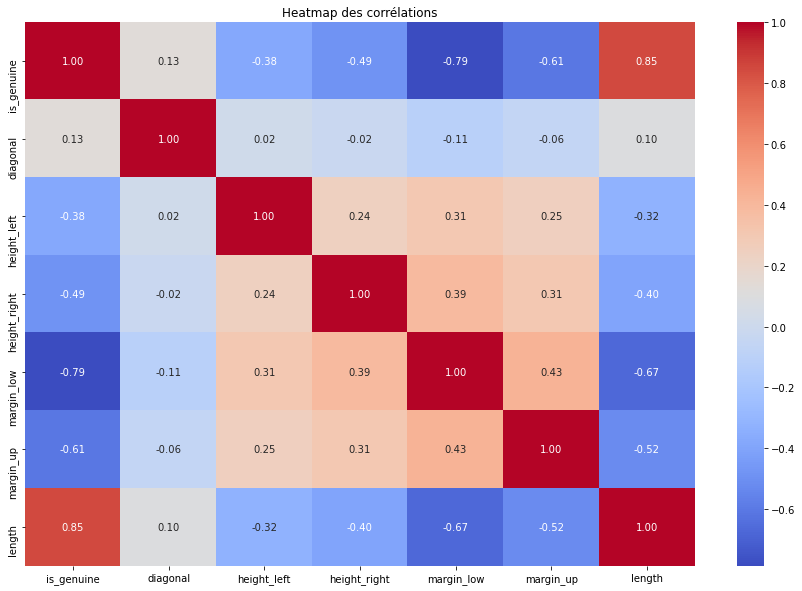

In [57]:
#Heatmap of linear correlations based on the previous matrix.
plt.figure(figsize=(15, 10))
sns.heatmap(data.iloc[:, :].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap des corrélations')

plt.show()

Indeed, we can see that our hypothesis was correct; the length and the authenticity of the banknote are strooooooooooooongly correlated !!!!!!!!!!!!

# Principal Component Analysis (PCA) Implementation

In [58]:
from sklearn.preprocessing import StandardScaler

We standardize our data.

In [59]:
std_scale = preprocessing.StandardScaler().fit(data)
X_scaled = std_scale.transform(data)

Let's take a look at the first 5 rows.

In [60]:
X_scaled[:5]

array([[ 0.70710678, -0.48653957,  2.77412327,  3.16324041,  0.0563237 ,
        -1.128325  ,  0.17365114],
       [ 0.70710678, -1.63372936, -2.23653528, -0.79966777, -1.08059227,
        -0.69679916,  0.47166629],
       [ 0.70710678,  2.3978233 ,  1.50475644, -1.29119126, -0.12558286,
        -0.91256208,  0.55190114],
       [ 0.70710678, -1.96149786, -0.39929381,  0.06049835, -1.30797546,
        -0.61049399,  0.95307539],
       [ 0.70710678, -0.74875438,  0.83666863, -1.41407214, -0.67130252,
         1.41767746, -0.15875038]])

We are checking the means and standard deviations of standardized value

In [61]:
index = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[index, :]

,0,1,2,3,4,5,6
mean,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0


---

The maximum number of components that can be analyzed is the minimum between p (number of variables/columns) and n (number of individuals) minus 1. Here, we have 1500 individuals and 7 variables. Therefore, the maximum number of components that can be analyzed is 7.

First, it creates an instance of the PCA class from the decomposition module of the sklearn library with the n_components parameter set to 5. This means that we want to keep 5 principal components when reducing dimensionality.

In [62]:
from sklearn import decomposition
pca= decomposition.PCA()

Next, the fit method is called on the pca object to perform Principal Component Analysis (PCA) on the scaled data X_scaled.

In [63]:
pca.fit(X_scaled)

print(pca.explained_variance_ratio_.cumsum())


[0.49217448 0.63788953 0.75063614 0.85292389 0.93797577 0.98427918
 1.        ]


The explained_variance_ratio_ method returns the percentages of variance explained by each component. By taking the cumulative sum of these percentages using the cumsum() method, we get the proportions of total variance explained by the first 5 components.
The good news is that 64% of the variance is explained by the first two principal components!

In [64]:
X_trans=pca.transform(X_scaled)

Finally, the transform method is called to transform the initial data X_scaled into a reduced-dimensional array X_trans, containing the projections of observations onto the first 7 principal components.

In [65]:
n_components = 7

# Creating the scree plot

_A Scree plot is a graph that allows you to visualize the eigenvalues (or explained variances) of each principal component obtained during a PCA._

In [66]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6, 7]

We calculate the variance explained by each principal component of the PCA and round it to two decimal places using the `.round()` method. We store it in the variable `scree`, which contains the percentages of explained variance for each principal component.

In [67]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([49.22, 14.57, 11.27, 10.23,  8.51,  4.63,  1.57])

In [68]:
scree_cum = scree.cumsum().round()
scree_cum

array([ 49.,  64.,  75.,  85.,  94.,  98., 100.])

The variable `scree_cum` contains the cumulative sum of the percentages of explained variance for each principal component. The first component explains 49% of the total variance, the first two components explain 64% of the total variance, the first three components explain 75% of the total variance, the first four components already explain approximately 85%, and so on.

We create a visualization: a Scree plot, which displays the eigenvalues of each principal component. This plot helps us decide how many principal components to retain for dimensionality reduction.

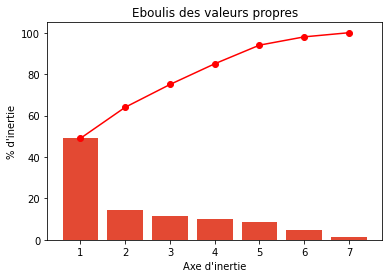

In [69]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("Axe d'inertie")
plt.ylabel("% d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

# Data split 

To make our life easier later on, we will split the data present in our df data. The values have been saved in a variable X, the standardized values have been saved in a variable X_scaled, the index of the bills will be stored in a variable 'names', and the column names will be saved in a variable 'features'.

In [70]:
names= data.index

We verify.

In [71]:
names

RangeIndex(start=0, stop=1500, step=1)

In [72]:
# "and the column names will be saved in a variable called features."
features = data.columns

In [73]:
features

Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length'],
      dtype='object')

# Study the relationships between variables using the correlation circle.

As for the creation of the correlation circle, please follow the comments. Specify `X=0` and `y=1` for the first factorial plane.

In [74]:
x, y = 0,1

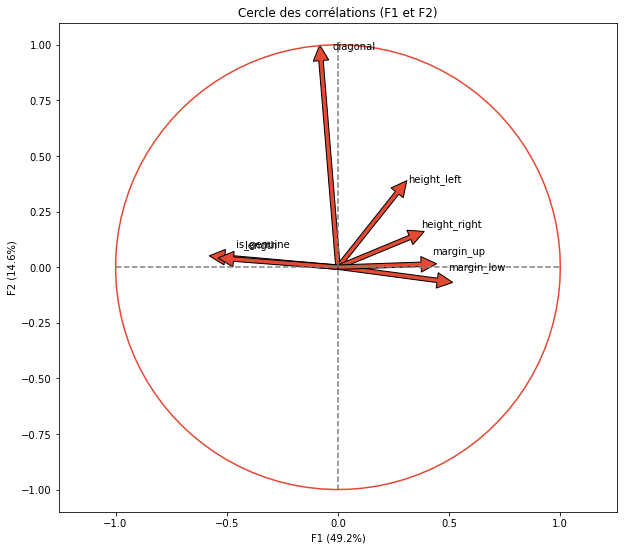

In [75]:
fig, ax = plt.subplots(figsize=(10, 9))
# Create a figure and one or more axes for plotting the correlation circle,
# with a figure size of 10 inches in width and 9 inches in height.

for i in range(0, pca.components_.shape[1]):
    # Iterate through each column of the principal components matrix pca.components_.
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )
# Draw an arrow from the origin (0,0) in the direction of the coordinates of the principal component for the corresponding variable,
# with a head width of 0.07, head length of 0.07, and line width of 0.02.


    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i])
    # Add the name of the corresponding variable to the end of the arrow, with an offset of 0.05 in the x and y direction from the arrow.


    
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')
# Draw a horizontal dashed gray line at y=0 and a vertical dashed gray line at x=0 to represent the axes.


# Axis labels, with the percentage of explained inertia

plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
# Draw a unit circle centered at the origin to provide a visual reference for the scale.

plt.axis('equal')
# Make the x and y axis scales equal to have a perfectly circular correlation circle.
.
plt.show(block=False)

We notice that the variable 'diagonal' is highly correlated with F2.

The variables most correlated with F1 and with each other are:

- height_left,
- height_left
- margin up
- and margin low
- Is_genuine and length are highly correlated with each other but negatively with F1

The variable most correlated with F2 is the diagonal.

F1 can be interpreted as the "length" (if I can coin a term). F2, on the other hand, can be interpreted as the "diagonal.

# Kmeans

It is important to note that determining the appropriate number of clusters using the elbow method or silhouette score would have been irrelevant in this case. We don't need it since we want to divide our data into two categories (real banknotes and fake ones).

In [82]:
cls2=cluster.KMeans(n_clusters=2)
cls2.fit(X_scaled)

KMeans(n_clusters=2)

In [83]:
clusters_kmeans2 = cls2.labels_

Using the `labels_` method of the KMeans object (`cls2`), we can obtain the cluster labels for each observation. It returns a one-dimensional array where each value corresponds to the assigned cluster for the corresponding observation in `X_scaled`.

In [84]:
clusters_kmeans2

array([0, 1, 1, ..., 0, 0, 0])

Each observation has been assigned to a cluster, and we should have a total of 1500 observations (equivalent to 1500 rows/bills). Let's verify this assertion.

In [85]:
clusters_kmeans2.size

1500

# Study the variability of individuals with representation on the first factorial plane.

We will now project our individuals (the bills) onto the first factorial plane, and the labels of the clusters to which they belong.

In [86]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="."):
"""
     Shows the projection of individuals

     Positional arguments:
     ------------------------------------
     X_projected: np.array, pd.DataFrame, list of list: the matrix of projected points
     x_y: list or tuple: the pair x,y of the plans to display, example [0,1] for F1, F2

     Optional arguments:
     ------------------------------------
     pca: sklearn.decomposition.PCA: a PCA object that has been fitted, this will allow us to display the variance of each component, default = None
     labels: list or tuple: the labels of the individuals to project, default = None
     clusters: list or tuple: the list of clusters to which each individual belongs, default = None
     alpha: float in [0,1]: transparency parameter, 0=100% transparent, 1=0% transparent, default = 1
     figsize: list or tuple: couple width, height which defines the size of the figure in inches, default = [10.8]
     marker: str: the type of marker used to represent individuals, cross points etc etc, default = "."
     """

    # Transform X_projected into np.array
    X_ = np.array(X_projected)

    # We define the shape of the figure if it has not been given
    if not figsize: 
        figsize = (10,8)

    # We manage the labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # We check the axis variable
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # we define x and y
    x, y = x_y

    # Figure initialization      
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # We check if there are clusters or not
    c = None if clusters is None else clusters
 
    # Dots  
    #plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # If the pca variable has been provided, we can calculate the % variance of each axis
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Name of the axes, with the percentage of inertia explained
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Value x max and y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # We bound x and y
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Display of horizontal and vertical lines
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

   # Display of point labels
    if len(labels) : 
        
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Title and display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()


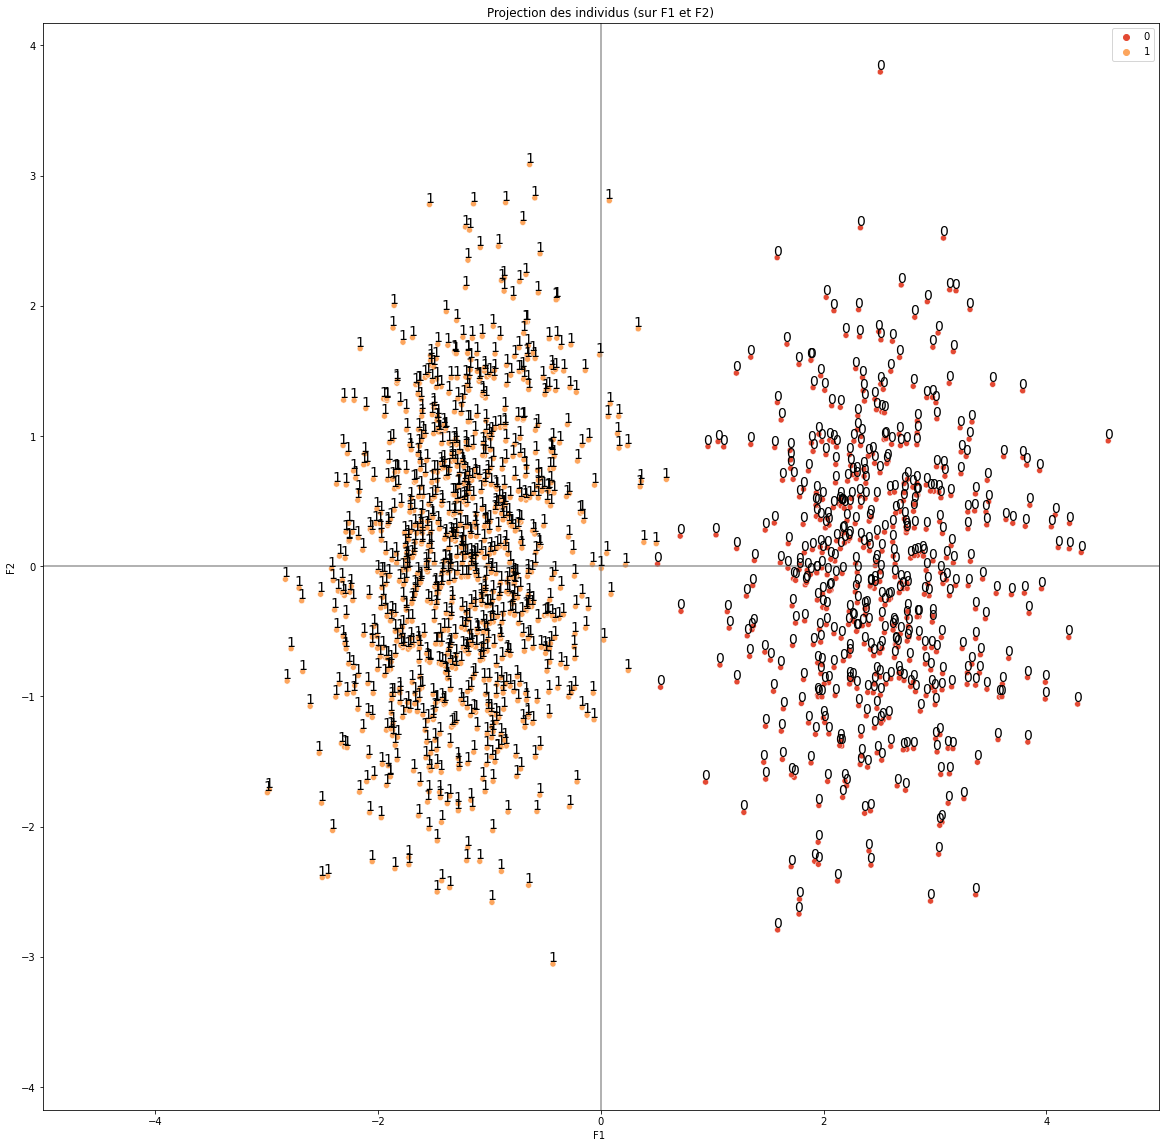

In [87]:
x_y = [0,1]
display_factorial_planes(X_trans,  x_y, labels = cls2.labels_ , clusters=clusters_kmeans2, figsize=[20,20])

We see that it is the F1 axis which mainly separates real banknotes from counterfeit banknotes. As we have already seen, real notes are longer than fake ones, which is why they occupy the left of the factorial plan.
A vertical line clearly separates real notes from counterfeit notes.
The F2 axis explains 14% of the inertia, and participates in the representation of the banknotes.

**Hypothesis the counterfeiters may be trying to save paper.**